In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
from scipy import stats

In [2]:
FILE_NAME = "../../data/radio_logs2019.csv"

sns.set_palette(sns.color_palette("colorblind"))
sns.set_style("darkgrid")

In [3]:
print("Reading data...")
data = pd.read_csv(FILE_NAME)
print(f"Data shape: {data.shape[0]} lines, {data.shape[1]} columns")

Reading data...
Data shape: 5529150 lines, 3 columns


In [4]:
data

,radio,sng_id,ts
0,Jazz Radio,14476372,2020-04-01 12:39:44.000
1,RTL2,9997018,2020-01-08 08:48:26.000
2,Ouï FM,9997018,2019-11-14 01:34:49.000
3,Contact FM,9997018,2018-12-21 13:00:24.000
4,Contact FM,9997018,2019-02-05 03:43:37.000
...,...,...,...
5529145,Contact FM,810557802,2020-03-20 01:00:00.000
5529146,Contact FM,810557802,2020-03-01 13:19:36.000
5529147,Champagne FM,810557802,2020-02-15 06:44:55.000
5529148,Champagne FM,810557802,2020-03-24 14:00:52.000


# Diversity

In [65]:
# Calculate S/P for each radio station
radio_groups = data.groupby(["radio", "sng_id"]).size()
ratios = radio_groups.groupby(["radio"]).size().divide(radio_groups.sum(level="radio")).to_frame().reset_index()
ratios.columns = ["radio", "S/P"]
ratios

,radio,S/P
0,ABC Lounge Jazz,0.015884
1,Alouette,0.024638
2,Beur FM,0.053563
3,Champagne FM,0.009632
4,Chante France,0.007186
5,Chí©rie FM,0.024188
6,Contact FM,0.017108
7,Djam Radio,0.044329
8,FG,0.050314
9,Fip,0.333282


In [6]:
ratios.to_csv("../../data/radio_diversity.csv", index=False)

In [304]:
ratios = pd.read_csv("../../data/radio_diversity.csv")

In [305]:
# sp_u = [sp_users[sp_users["bin_u"] == i+1] for i in range(4)]

# quantiles = [[spu["ratio"].quantile(i) for i in np.arange(.25, 1, .25)] for spu in sp_u]
# quantiles = [pd.DataFrame(q) for q in quantiles]
# for idx, q in enumerate(quantiles):
#     q["type"] = idx+1
#     q["radio"] = ["Q1", "Median", "Q3"]
#     q.rename(columns={0: "S/P"}, inplace=True)

# # Adding users to radio ratios -- with separation
# ratios["type"] = 0
# ratios = pd.concat([ratios, *quantiles])  # First time using this stuff for non-meme reason
# ratios

In [306]:
# Fetching user ratios
sp_users = pd.read_csv("../../data/sp_ratios_full.csv")

quantiles = [sp_users["ratio"].quantile(i) for i in np.arange(.25, 1, .25)]
quantiles = pd.DataFrame(quantiles)
quantiles["type"] = "user"
quantiles["radio"] = ["Q1", "Median", "Q3"]
quantiles.rename(columns={0: "S/P"}, inplace=True)

# Adding users to radio ratios -- with separation
ratios["type"] = "radio"
ratios = pd.concat([ratios, quantiles])
ratios

,radio,S/P,type
0,ABC Lounge Jazz,0.015884,radio
1,Alouette,0.024638,radio
2,Beur FM,0.053563,radio
3,Champagne FM,0.009632,radio
4,Chante France,0.007186,radio
5,Chí©rie FM,0.024188,radio
6,Contact FM,0.017108,radio
7,Djam Radio,0.044329,radio
8,FG,0.050314,radio
9,Fip,0.333282,radio


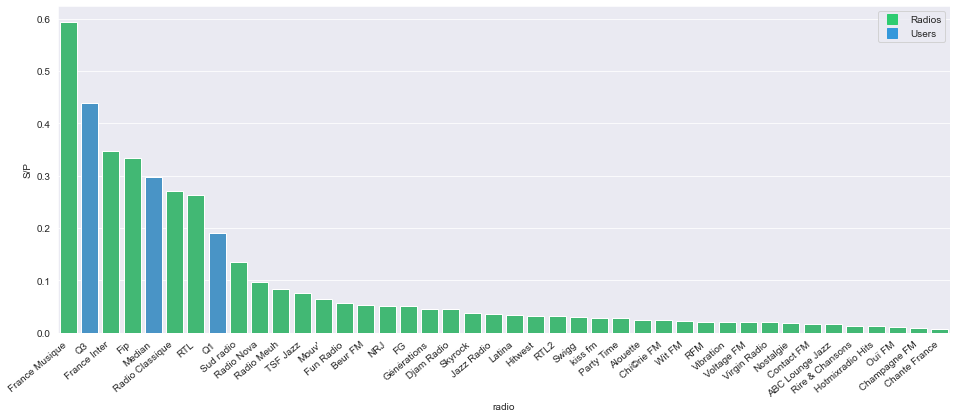

In [307]:
# Sorting for visual effect
ratios.sort_values("S/P", ascending=False, inplace=True)
clrs = ["#2ecc71" if x == "radio" else "#3498db" for x in ratios["type"]]

f, ax = plt.subplots(figsize=(16, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# Plotting in two separate 
bars = sns.barplot(x="radio", y="S/P", data=ratios, palette=clrs)

# Custom legends are a pain
radios_line = mlines.Line2D([], [], color="#2ecc71", marker="s", linestyle='None',
                          markersize=10, label="Radios")
users_line = mlines.Line2D([], [], color="#3498db", marker="s", linestyle='None',
                          markersize=10, label="Users")
ax.legend(handles=[radios_line, users_line])
# ax.legend(["users", "radios"], loc='upper right', frameon=False)

plt.savefig("../../results/radio/radios_sp.pdf")

In [29]:
# Reproduction de la figure 1b) -- S/P en fonction de P
radio_logp = np.log(data.groupby("radio").size()).to_frame().reset_index().rename(columns={0: "logp"})
radio_logp = ratios.merge(radio_logp, on="radio")

radio_logp["quantile"] = pd.cut(radio_logp["logp"], np.arange(9.5, 13.5, 1))

plays_means = radio_logp.groupby(["quantile"]).mean()["S/P"].to_frame().reset_index().drop("quantile", axis=1)
plays_means["logp"] = np.arange(10, 13, 1)
plays_means

,S/P,logp
0,0.198582,10
1,0.192082,11
2,0.044283,12


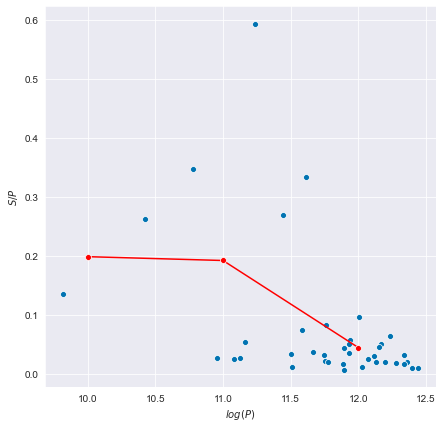

In [31]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="logp", y="S/P", data=radio_logp)
sns.lineplot(x="logp", y="S/P", data=plays_means, color="r", marker= "o")
ax.set(ylabel="$S/P$", xlabel="$log(P)$")
plt.savefig("../../results/radio/sp_logp_bins_radio.pdf")

# Mainstream

In [5]:
import nbimporter
import mainstream_tests

Importing Jupyter notebook from mainstream_tests.ipynb


In [6]:
data

,radio,sng_id,ts
0,Jazz Radio,14476372,2020-04-01 12:39:44.000
1,RTL2,9997018,2020-01-08 08:48:26.000
2,Ouï FM,9997018,2019-11-14 01:34:49.000
3,Contact FM,9997018,2018-12-21 13:00:24.000
4,Contact FM,9997018,2019-02-05 03:43:37.000
...,...,...,...
5529145,Contact FM,810557802,2020-03-20 01:00:00.000
5529146,Contact FM,810557802,2020-03-01 13:19:36.000
5529147,Champagne FM,810557802,2020-02-15 06:44:55.000
5529148,Champagne FM,810557802,2020-03-24 14:00:52.000


In [7]:
songs = pd.read_csv("../../data/songs_artists_full.csv")
data = data.merge(songs, on="sng_id")

In [ ]:
# This is very long and really should be optimized but I'm not feeling like it rn
data["ts"] = pd.to_datetime(data["ts"])
data["year"] = data["ts"].map(lambda x: x.year)
data["month"] =  data["ts"].map(lambda x: x.month)
data["hour"] = data["ts"].map(lambda x: x.hour)
data

In [17]:
radio_range = list(np.arange(0, 25000, 1))
sampled_data = data[data["year"] == 2019].sort_values("ts").groupby("radio", as_index=False).nth(radio_range)

In [18]:
BIN_AMNT = 4
# Binning -- see mainstream_tests.ipynb
sampled_data = mainstream_tests.bin_artists(sampled_data, bin_amnt=BIN_AMNT)

# Reversing bin numbers -- just a dirty little workaround to have the "mainstreamest" bin be 1
sampled_data["bin_nb"] = BIN_AMNT+1 - sampled_data["bin_nb"]

# Occurences of music plays in each bin
bin_distrib = sampled_data.groupby("bin_nb").size()

# Normalized
bin_distrib /= bin_distrib.sum()

Counting artist occurences...
Binning artists...
Number of artists per bin: 
bin
(-928.222, 232306.5]    24420
(232306.5, 464612.0]      996
(464612.0, 696917.5]      227
(696917.5, 929223.0]       65
dtype: int64
Artists binned into 4 categories.


## Hours tests

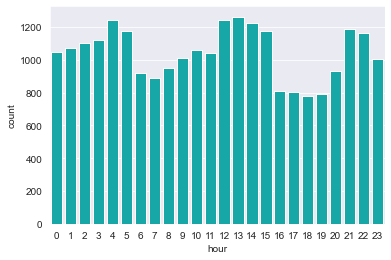

In [24]:
sns.countplot(x="hour", data=sampled_data[sampled_data["radio"] == "Radio Nova"], color="c")

In [36]:
time_mu_diff = (sampled_data.groupby(["radio", "hour"]).mean()["bin_nb"] - sampled_data.groupby(["radio"]).mean()["bin_nb"]).reset_index()
time_mu_diff

,radio,hour,bin_nb
0,ABC Lounge Jazz,0,-0.022052
1,ABC Lounge Jazz,1,-0.021978
2,ABC Lounge Jazz,2,0.012457
3,ABC Lounge Jazz,3,-0.060906
4,ABC Lounge Jazz,4,0.002423
...,...,...,...
907,kiss fm,19,0.113520
908,kiss fm,20,-0.004415
909,kiss fm,21,0.062910
910,kiss fm,22,0.059679


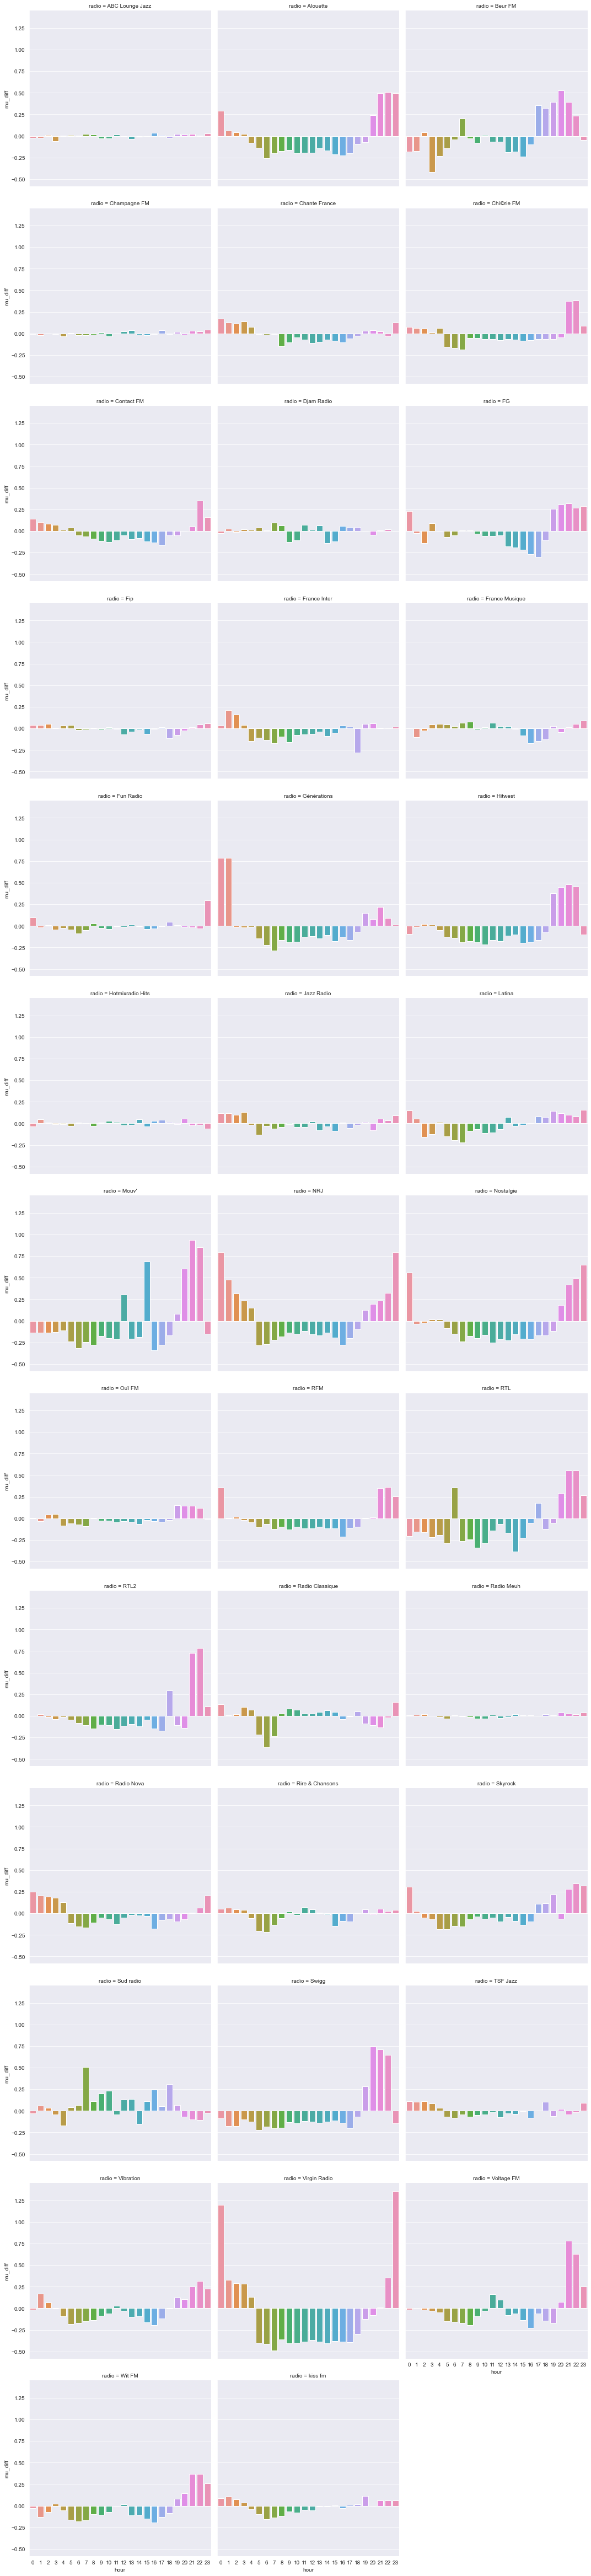

In [48]:
ax = sns.catplot(x="hour", y="mu_diff", col="radio", col_wrap=3, kind="bar", data=time_mu_diff.rename(columns={"bin_nb": "mu_diff"}))
plt.savefig("../../results/radio/hour_mu.pdf")

In [70]:
mu_diff_df = time_mu_diff.groupby("radio").std()["bin_nb"].to_frame().rename(columns={"bin_nb": "mu_diff_std"}).merge(sampled_data.groupby(["radio"]).mean()["bin_nb"], on="radio").rename(columns={"bin_nb": "mu_mean"})
mu_diff_df

,mu_diff_std,mu_mean
radio,,
ABC Lounge Jazz,0.023587,3.560440
Alouette,0.245784,2.033400
Beur FM,0.244757,2.819280
Champagne FM,0.023201,1.886800
Chante France,0.091335,2.327160
Chí©rie FM,0.139917,2.043080
Contact FM,0.119286,1.678520
Djam Radio,0.065271,3.646440
FG,0.187369,2.492640


In [93]:
# Needs to be read (a few cells under) before...
user_mu_diff_df = user_data.groupby("bin_u_s").mean()["bin_nb"].to_frame().rename(columns={"bin_nb": "mu_mean"}).merge(user_data.groupby("bin_u_s").std()["bin_nb"], on="bin_u_s").rename(columns={"bin_nb": "mu_diff_std"})
user_mu_diff_df.index.names = ["radio"]
user_mu_diff_df

,mu_mean,mu_diff_std
radio,,
a,2.662461,1.052265
e,2.304885,1.081036
o,2.554047,1.105540
o+,2.447411,1.139466


In [105]:
user_data = user_data.rename(columns={"bin_u_s": "radio"})
data_mu_df = pd.concat([sampled_data[["radio", "bin_nb"]].merge(mu_diff_df["mu_mean"], on="radio"),
                       user_data[["radio", "bin_nb"]].merge(user_mu_diff_df["mu_mean"], on="radio")])
data_mu_df

,radio,bin_nb,mu_mean
0,Fip,4,3.621240
1,Fip,4,3.621240
2,Fip,4,3.621240
3,Fip,4,3.621240
4,Fip,4,3.621240
...,...,...,...
48903876,e,3,2.304885
48903877,e,3,2.304885
48903878,e,3,2.304885
48903879,e,3,2.304885


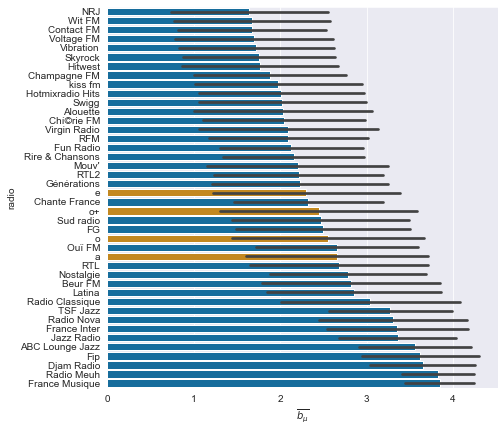

In [118]:
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x="bin_nb", y="radio", data=data_mu_df.sort_values("mu_mean"), ci="sd", palette=[sns.color_palette("colorblind")[1] if (len(i) < 2 or i == "o+") else sns.color_palette("colorblind")[0] for i in data_mu_df.sort_values("mu_mean")["radio"].unique()])
ax.set(xlabel="$\overline{b_\mu}$")

plt.savefig("../../results/radio/mu_mean_std.pdf")

In [126]:
pd.concat([user_mu_diff_df, mu_diff_df]).to_csv("../../results/radio/mu_mean_std.csv")

## ----------------------

In [76]:
user_data = pd.read_csv("../../data/spring2020/all_binned.csv")[["user_id", "bin_nb", "bin_u", "bin_u_s"]]
user_data

,user_id,bin_nb,bin_u,bin_u_s
0,49d2e98bcb58048af766d54872159ebb9849973f,4,4,a
1,49d2e98bcb58048af766d54872159ebb9849973f,4,4,a
2,49d2e98bcb58048af766d54872159ebb9849973f,4,4,a
3,49d2e98bcb58048af766d54872159ebb9849973f,4,4,a
4,49d2e98bcb58048af766d54872159ebb9849973f,4,4,a
...,...,...,...,...
48903876,07cde156200ef765a0754d62753d2addd812bb53,4,1,o+
48903877,07cde156200ef765a0754d62753d2addd812bb53,4,1,o+
48903878,07cde156200ef765a0754d62753d2addd812bb53,4,1,o+
48903879,07cde156200ef765a0754d62753d2addd812bb53,4,1,o+


In [64]:
user_ratios = (user_data.groupby(["bin_u_s", "bin_nb"]).size() / user_data.groupby(["bin_u_s"]).size()).reset_index()
user_ratios["bin_u_s"] = user_ratios["bin_u_s"].map(lambda x: "$b_u$ " + x)
user_ratios.columns = ["radio", "bin_nb", "ratio"]
user_ratios.set_index(["radio", "bin_nb"], inplace=True)
user_ratios

ratio
radio    bin_nb          
$b_u$ a  1       0.171027
         2       0.266285
         3       0.291887
         4       0.270800
$b_u$ e  1       0.290666
         2       0.301471
         3       0.220175
         4       0.187688
$b_u$ o  1       0.226494
         2       0.254041
         3       0.258389
         4       0.261076
$b_u$ o+ 1       0.280427
         2       0.236882
         3       0.237544
         4       0.245147

## Figure 7-like

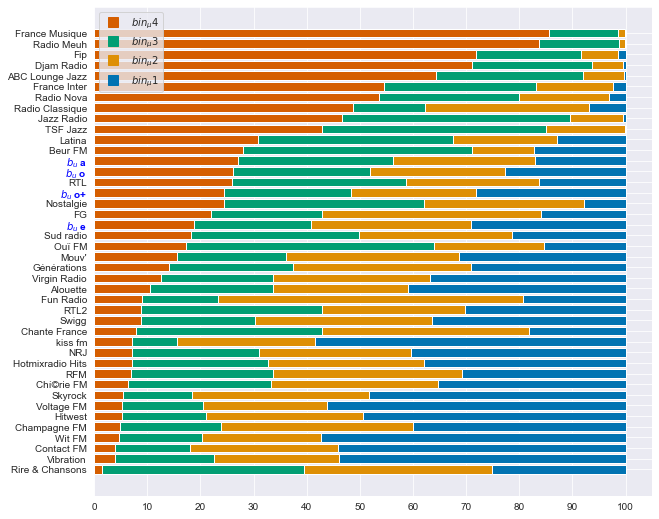

In [73]:
user_frame = sampled_data.groupby(["radio", "bin_nb"]).size().to_frame()
user_frame.columns = ["ratio"]
# Adding users
user_frame = pd.concat([user_frame, user_ratios])

# Our user_frame ends up with [user, bin_nb, ratio]
user_plays = user_frame["ratio"].sum(level=0)
# user_frame = user_frame.unstack('bin_nb').divide(bin_distrib, level=1).divide(user_plays, axis=0).stack("bin_nb")
user_frame = user_frame.unstack('bin_nb').divide(user_plays, axis=0).stack("bin_nb")

user_frame = user_frame.reset_index()


f, ax = plt.subplots(figsize=(10, 9))

user_frame["ratio"] *= 100
y_pos = np.arange(len(user_frame["radio"].unique()))

# Pre-sorting series (weirdly but trust me there's no better way)
indices_sorted = user_frame[user_frame["bin_nb"] == 4]["ratio"].sort_values(ascending=False).index

series = [user_frame.loc[indices_sorted-i]["ratio"].reset_index(drop=True) for i in range(4)]

ax.barh(y_pos, series[0], color=sns.color_palette("colorblind")[3])
ax.barh(y_pos, series[1], left=series[0], color=sns.color_palette("colorblind")[2])
ax.barh(y_pos, series[2], left=series[0] + series[1], color=sns.color_palette("colorblind")[1])
ax.barh(y_pos, series[3], left=series[0] + series[1] + series[2], color=sns.color_palette("colorblind")[0])

# ax.barh(y_pos, user_frame[user_frame["bin_nb"] == 4]["ratio"].reset_index(drop=True) + user_frame[user_frame["bin_nb"] == 1]["ratio"].reset_index(drop=True) + user_frame[user_frame["bin_nb"] == 2]["ratio"].reset_index(drop=True) + user_frame[user_frame["bin_nb"] == 3]["ratio"].reset_index(drop=True), left=user_frame[user_frame["bin_nb"] == 3]["ratio"].reset_index(drop=True))

ax.set_yticks(y_pos)
ax.set_xticks(np.arange(0, 101, 10))
ax.set_yticklabels(user_frame[user_frame["bin_nb"] == 4].sort_values("ratio", ascending=False)["radio"].unique())
ax.invert_yaxis()  # labels read top-to-bottom

bin1_line = mlines.Line2D([], [], color=sns.color_palette("colorblind")[3], marker="s", linestyle='None',
                          markersize=10, label="$bin_\mu 4$")
bin2_line = mlines.Line2D([], [], color=sns.color_palette("colorblind")[2], marker="s", linestyle='None',
                          markersize=10, label="$bin_\mu 3$")
bin3_line = mlines.Line2D([], [], color=sns.color_palette("colorblind")[1], marker="s", linestyle='None',
                          markersize=10, label="$bin_\mu 2$")
bin4_line = mlines.Line2D([], [], color=sns.color_palette("colorblind")[0], marker="s", linestyle='None',
                          markersize=10, label="$bin_\mu 1$")

ax.legend(handles=[bin1_line, bin2_line, bin3_line, bin4_line])
# ax.legend(["users", "radios"], loc='upper right', frameon=False)

# Color user bins (dirty way)
ax.get_yticklabels()[12].set_color("blue")
ax.get_yticklabels()[12].set(fontweight='bold')
ax.get_yticklabels()[13].set_color("blue")
ax.get_yticklabels()[13].set(fontweight='bold')
ax.get_yticklabels()[15].set_color("blue")
ax.get_yticklabels()[15].set(fontweight='bold')
ax.get_yticklabels()[18].set_color("blue")
ax.get_yticklabels()[18].set(fontweight='bold')

plt.savefig("../../results/radio/radios_mainstream_distrib_reversed.pdf")

In [74]:
test = user_frame.groupby(["radio", "bin_nb"]).sum().unstack().reset_index()
test.columns = ["radio", "1", "2", "3", "4"]
test["S/P"] = [sampled_ratios[sampled_ratios["radio"] == radio]["S/P"].values[0] for radio in test["radio"]]
test["log 4/1"] = np.log(test["4"] / test["1"])
test.corr(method="spearman")

NameError: name 'sampled_ratios' is not defined

In [85]:
# sp_mu_bins = np.arange(bin_mu_delta["bin_nb"].min(), bin_mu_delta["bin_nb"].max()+0.1, (bin_mu_delta["bin_nb"].max()-bin_mu_delta["bin_nb"].min()) / 4)
test_bins = np.arange(-3, 9, 2)

test["quantile"] = pd.cut(test["log 4/1"], test_bins)

test_means = test.groupby(["quantile"]).mean()["S/P"].to_frame().reset_index().drop("quantile", axis=1)

test_points = []
for i in range(test_bins.size - 1):
    test_points.append((test_bins[i] + test_bins[i+1]) / 2)

test_means["log 4/1"] = test_points
test_means

,S/P,log 4/1
0,0.054692,-2.0
1,0.110609,0.0
2,0.213907,2.0
3,0.324760,4.0
4,0.160173,6.0


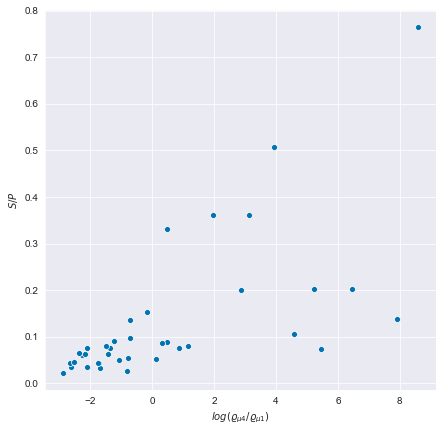

In [88]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x="log 4/1", y="S/P", data=test)
# sns.lineplot(x="log 4/1", y="S/P", data=test_means, color="r", marker= "o")
ax.set(ylabel="$S/P$", xlabel=r"$log(\varrho_{\mu4} / \varrho_{\mu1})$")
plt.savefig("../../results/radio/sp_radios_mu41.pdf")

# S/P & mainstream

## Figure ??

In [11]:
# Calculate S/P for the same sample as mainstream
sampled_radio_groups = sampled_data.groupby(["radio", "sng_id"]).size()
sampled_ratios = sampled_radio_groups.groupby(["radio"]).size().divide(sampled_radio_groups.sum(level="radio")).to_frame().reset_index()
sampled_ratios.columns = ["radio", "S/P"]
sampled_ratios

,radio,S/P
0,ABC Lounge Jazz,0.073480
1,Alouette,0.075960
2,Beur FM,0.088800
3,Champagne FM,0.036320
4,Chante France,0.026600
5,Chí©rie FM,0.043600
6,Contact FM,0.035560
7,Djam Radio,0.203600
8,FG,0.086520
9,Fip,0.506920


In [122]:
sampled_ratios["change"] = (sampled_ratios["S/P"] - ratios[ratios["radio"] != "Party Time"].reset_index(drop=True)["S/P"]) / ratios[ratios["radio"] != "Party Time"].reset_index(drop=True)["S/P"]

In [15]:
bin_mu_delta = sampled_data.groupby("radio").mean()["bin_nb"] - 2.5
bin_mu_delta = bin_mu_delta.to_frame().reset_index()
bin_mu_delta = bin_mu_delta.merge(sampled_ratios, on="radio")
bin_mu_delta

,radio,bin_nb,S/P
0,ABC Lounge Jazz,1.060720,0.073480
1,Alouette,-0.466600,0.075960
2,Beur FM,0.319240,0.088800
3,Champagne FM,-0.613080,0.036320
4,Chante France,-0.172400,0.026600
5,Chí©rie FM,-0.457120,0.043600
6,Contact FM,-0.821600,0.035560
7,Djam Radio,1.144120,0.203600
8,FG,-0.009080,0.086520
9,Fip,1.120680,0.506920


In [21]:
# sp_mu_bins = np.arange(bin_mu_delta["bin_nb"].min(), bin_mu_delta["bin_nb"].max()+0.1, (bin_mu_delta["bin_nb"].max()-bin_mu_delta["bin_nb"].min()) / 4)
sp_mu_bins = np.arange(-1, 2, .5)

bin_mu_delta["quantile"] = pd.cut(bin_mu_delta["bin_nb"], sp_mu_bins)

sp_mu_means = bin_mu_delta.groupby(["quantile"]).mean()["S/P"].to_frame().reset_index().drop("quantile", axis=1)

sp_mu_bins_points = []
for i in range(sp_mu_bins.size - 1):
    sp_mu_bins_points.append((sp_mu_bins[i] + sp_mu_bins[i+1]) / 2)

sp_mu_means["bin_nb"] = sp_mu_bins_points
sp_mu_means

,S/P,bin_nb
0,0.052280,-0.75
1,0.072531,-0.25
2,0.126067,0.25
3,0.233552,0.75
4,0.350400,1.25


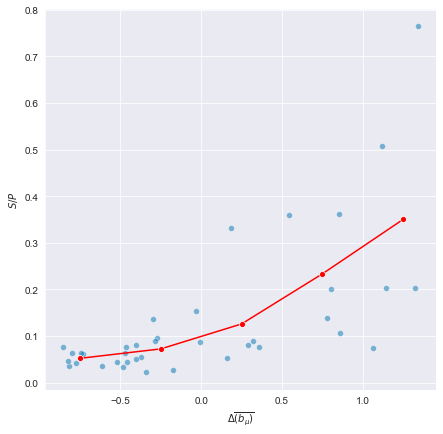

In [22]:
f, ax = plt.subplots(figsize=(7, 7))

sns.scatterplot(x="bin_nb", y="S/P", data=bin_mu_delta, alpha=0.5)
sns.lineplot(x="bin_nb", y="S/P", data=sp_mu_means, color="r", marker= "o")
ax.set(ylabel="$S/P$", xlabel="$\Delta\overline{(b_\mu)}$")

plt.savefig("../../results/radio/sp_deltamu_radios_2019_25000.pdf")

## Figure 6 ?